In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import sklearn

In [2]:
hours_calling = [2,3,4,5,6,1.5,5,7,8,10]
money_earned = [50,70,90,100,110,40,110,130,145,180]
call_center_df = pd.DataFrame({'hours_calling':hours_calling, 'money_earned':money_earned})
call_center_df_copy = call_center_df.copy()
call_center_df_copy

,hours_calling,money_earned
0,2.0,50
1,3.0,70
2,4.0,90
3,5.0,100
4,6.0,110
5,1.5,40
6,5.0,110
7,7.0,130
8,8.0,145
9,10.0,180


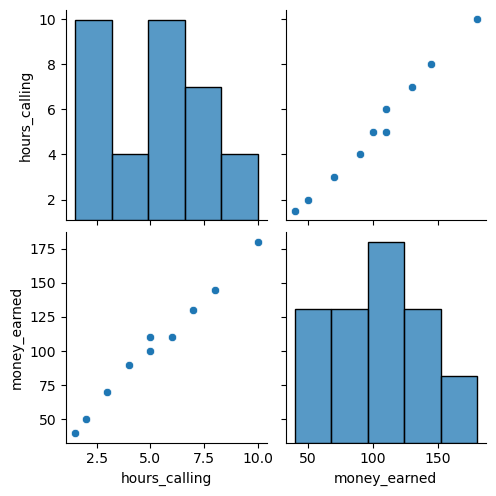

In [3]:
sns.pairplot(call_center_df_copy)
plt.show()

In [4]:
X = call_center_df_copy.drop('money_earned',axis=1)
y = call_center_df_copy.drop('hours_calling',axis=1)

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
prediction = model.predict(X_test)
model.coef_

array([[15.64393939]])

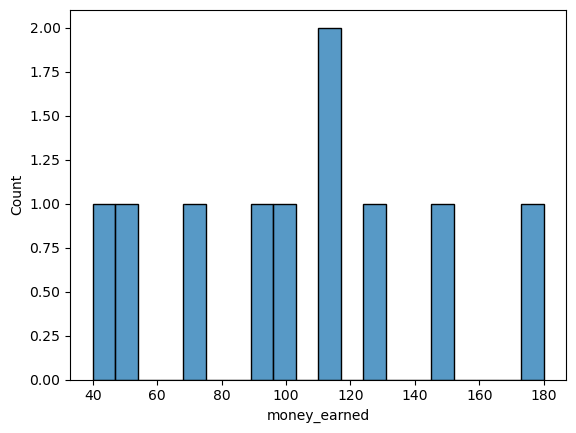

In [7]:
sns.histplot(data=call_center_df_copy,x='money_earned',bins=20)
plt.show()

In [10]:
mae = mean_absolute_error(y_test,prediction)
mse = mean_squared_error(y_test,prediction)
rmse = np.sqrt(mse)
mae_percentage = (mae*100/y['money_earned'].mean())
mse_percentage = (mse*100 /y['money_earned'].mean())
rmse_percentage = rmse*100 /y['money_earned'].mean()
print(call_center_df_copy['money_earned'].mean())
print(f"percntage of error: MAE: {mae_percentage} RMSE: {rmse_percentage}")

102.5
percntage of error: MAE: 3.098053707809807 RMSE: 3.9341077349391824


In [8]:
test_residuals = y_test - prediction
test_residuals

,money_earned
8,-2.992424
1,0.227273
5,-6.306818


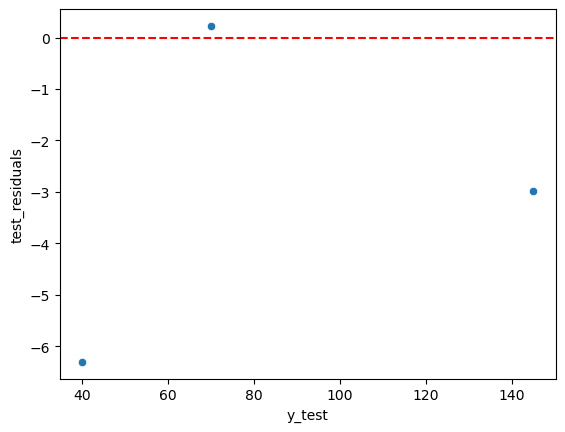

In [9]:
error_df = pd.DataFrame({'y_test': y_test['money_earned'], 'test_residuals': test_residuals['money_earned']})
sns.scatterplot(data=error_df,x='y_test',y='test_residuals')
plt.axhline(y=0, color='r', ls='--')
plt.show()

In [10]:
final_model = LinearRegression()
final_model.fit(X,y)
final_model.coef_

array([[15.85928489]])

In [13]:
from joblib import dump, load
dump(final_model,'models/call_center_model')

['models/call_center_model']

In [14]:
loaded_model = load('models/call_center_model')
loaded_model.coef_

array([[15.85928489]])

In [16]:
new_campaign = pd.DataFrame(columns=['hours_calling'],data=[[5],[15.5]])
loaded_model.predict(new_campaign)

array([[100.12110727],
       [266.64359862]])